# **Assignment 1:** Introduction to Neural Networks

#### **Course:** SCC0270-SCC5809 Artificial Neural Networks
#### **Professor:** Moacir Antonelli Ponti
#### **Assistant:** Sherlon Almeida da Silva

#### Obs.: This assignment was adapted from the 3D Graphics Systems course ([here](https://lvelho.impa.br/i3d23/)), proposed by Luiz Velho and Hallison Paz.

---
# **Personal Info:**
*   **Student:**
    *   Matheus Victal Cerqueira
    *   10276661

# **Neural Networks for Function Approximation**

In this assignment you will practice working with the Google Colab environment and PyTorch. You’ll also practice building a model to fit a function. The goals of this practice are the following:

-   Gain experience setting and using notebooks on Google Colab.
-   Develop familiarity with basic structures of PyTorch: tensors, autograd, modules.
-   Understand neural networks as functions and models for functions approximation.
-   Develop familiarity with the data-driven approach.
-   Train a neural network to fit 1D functions.
-   Use visualization tools to evaluate your result.

# 1. What is an Artificial Neural Network?

## 1.1 Perceptron: the artificial neuron

* Perceptron, [implementação de Thomas Countz](https://www.thomascountz.com/2018/04/05/19-line-line-by-line-python-perceptron)

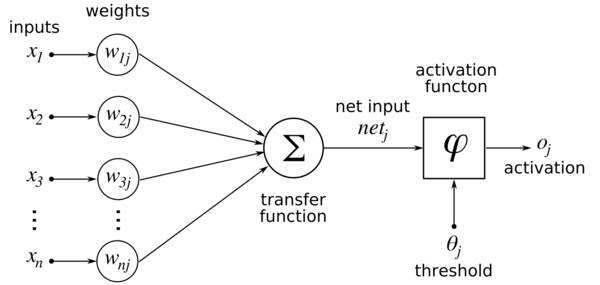

## **Task 1:** (2 pts) Can you implement a Perceptron without using a deep learning specific framework?

i.e. using regular numerical processing libraries such as numpy

In [ ]:
import numpy as np
# your perceptron implementation here

### Validate your Perceptron implementation with Logic Gates **AND** and **OR**.


### AND Logic gate
Validate an AND logic gate to verify its separability using your perceptron implementation.

In [ ]:
#Input Data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0,0,0,1])

#Train
nD_inputs = len(X[0]) #The dimensionality
and_ = Perceptron(nD_inputs)
and_.train(X, y)
print("Weights:", and_.weights)

In [ ]:
import torch

#Generating sample points between [0, 1] to Test and Plot
n_samples = 10
dimensionality = 2
test = torch.rand([n_samples, dimensionality])

#Test
for curr_test in test:
  print("Test:", curr_test, "---> Predicted:", and_.predict(curr_test))

Test: tensor([0.6111, 0.1550]) ---> Predicted: 0
Test: tensor([0.6453, 0.7171]) ---> Predicted: 1
Test: tensor([0.1509, 0.5605]) ---> Predicted: 0
Test: tensor([0.0040, 0.1522]) ---> Predicted: 0
Test: tensor([0.8512, 0.1156]) ---> Predicted: 0
Test: tensor([0.8749, 0.4331]) ---> Predicted: 1
Test: tensor([0.8587, 0.8526]) ---> Predicted: 1
Test: tensor([0.7938, 0.1956]) ---> Predicted: 0
Test: tensor([0.1809, 0.9302]) ---> Predicted: 0
Test: tensor([0.4105, 0.0597]) ---> Predicted: 0


#### Visualize the learned function, as well as the points

### **Task 2:** (1 pt) Modify the following code to color the 1s and 0s as predicted by the network.


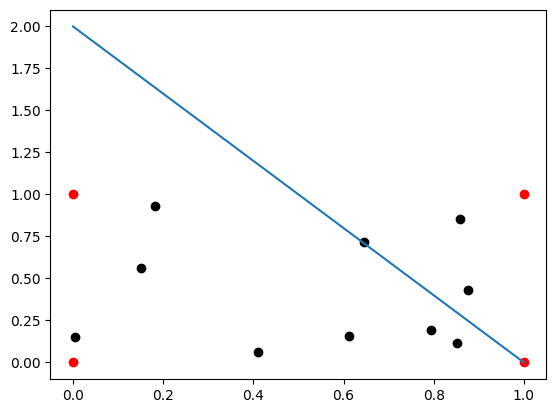

In [ ]:
import matplotlib.pyplot as plt
avoid_zero_division = 0.000001
b = and_.weights[0] + avoid_zero_division
a = and_.weights[1] + avoid_zero_division
x = and_.weights[2] + avoid_zero_division

slope = -(b/x)/(b/a) #Coeficiente angular
intercept = -b/x     #Coeficiente linear

#Plot train data
for curr_data in X:
  x = curr_data[0]
  y = curr_data[1]
  plt.plot(x, y,'ro')

#Plot test data
# write your code here

#Plot line learned during training
#y = mx + c, m is slope and c is intercept
x1 = 0
y1 = (slope*x1) + intercept

x2 = 1
y2 = (slope*x2) + intercept

plt.plot([x1,x2], [y1,y2])
plt.show()

### OR Logic gate
Validate an OR logic gate to verify its separability using your perceptron implementation.

### **Task 3**: (1 pts) **Describe what you observed during the experiments:**

(your observations)

## 1.2 Multilayer Perceptron

Multilayer Perceptron is a fully connected class of neural networks which presents multiple perceptrons connected in a computational graph that "flows" from inputs to outputs.

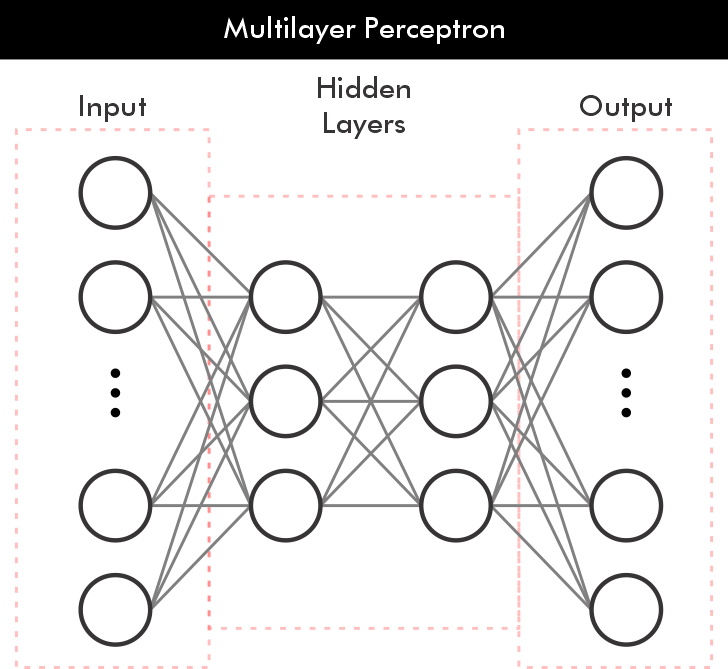

# 2. How can we build a MLP network in PyTorch?

In [ ]:
import torch
import numpy as np
from torch import nn

In [ ]:
class LineNetwork(nn.Module):
  # Initialization
  def __init__(self):
    super().__init__()
    # a single perceptron
    self.layers = nn.Sequential(
        nn.Linear(1, 1)
    )

  # how the network operates
  def forward(self, x):
    return self.layers(x)

# 3. How can we train a neural network?

Let's train our network to regress a simple affine function. A single Perceptron should be able to approximate a line, right?

## 3.1 Preparing the data infrastructure

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch.distributions.uniform as urand

In [ ]:
# This is a Dataset class to work with PyTorch
class AlgebraicDataset(Dataset):
  '''Abstraction for a dataset of a 1D function'''

  def __init__(self, f, interval, nsamples):
    X = urand.Uniform(interval[0], interval[1]).sample([nsamples])
    self.data = [(x, f(x)) for x in X]

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]

In [ ]:
# we need a function
line = lambda x: 2*x + 3
# a domain for our function
interval = (-10, 10)
# the number of points we are going to sample for training
train_nsamples = 1000
# the number of points we are going to evaluate our model on
test_nsamples = 100

In [ ]:
train_dataset = AlgebraicDataset(line, interval, train_nsamples)
test_dataset  = AlgebraicDataset(line, interval, test_nsamples)

train_dataloader = DataLoader(train_dataset, batch_size=train_nsamples, shuffle=True)
test_dataloader  = DataLoader(test_dataset, batch_size=test_nsamples, shuffle=True)

# 3.2 Hyperparameters for Optimization

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"running on {device}")

running on cuda


In [ ]:
model = LineNetwork().to(device) #Aloca memória na GPU e copia os dados para lá.

In [ ]:
# Loss Function: Mean Squared Error
lossfunc = nn.MSELoss()

# SGD = Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

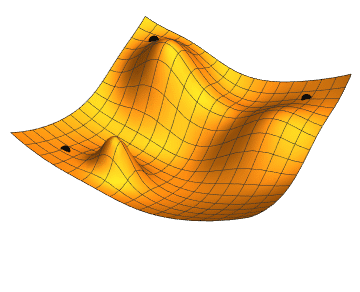

## **Task 4**: (5 pts) implement the functions that allow training and testing the model

In [ ]:
def train(model, dataloader, lossfunc, optimizer):
  '''A function for training our model'''
  #Write your code here

def test(model, dataloader, lossfunc):
  '''A function for evaluating our model on test data'''
  #Write your code here

# 3.3 Training the network



In [ ]:
# for visualization
import imageio
import matplotlib.pyplot as plt
from skimage import img_as_ubyte

In [ ]:
# Function to visualize results (to be used later in the notebook)
def plot_comparison(f, model, interval=(-10, 10), nsamples=10, return_array=True, epoc="None", loss="None"):
  fig, ax = plt.subplots(figsize=(10, 10))

  ax.grid(True, which='both')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_color('none')

  samples = np.linspace(interval[0], interval[1], nsamples)
  model.eval()
  with torch.no_grad():
    pred = model(torch.tensor(samples).unsqueeze(1).float().to(device))

  ax.plot(samples, list(map(f, samples)), "o", label="ground truth")
  ax.plot(samples, pred.cpu(), label="model")
  #print(samples, pred.cpu())
  plt.title(f"Epocs: {epoc}, Loss: {loss:.4f}")
  plt.legend()
  plt.show()
  # to return image as numpy array
  if return_array:
    fig.canvas.draw()
    img_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    return img_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))

Epoch: 0; Train Loss: 145.3670654296875


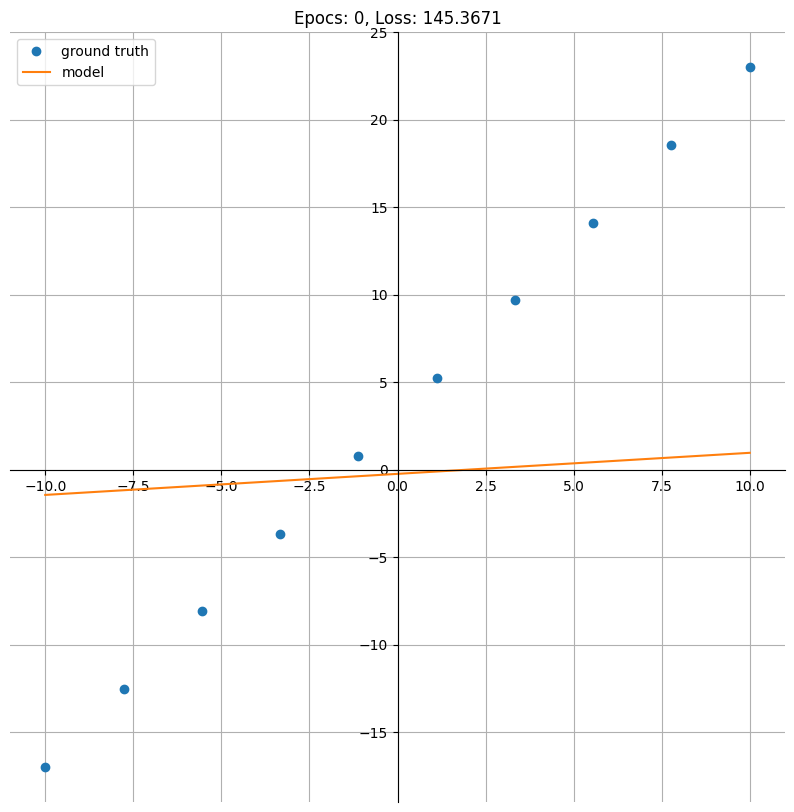

Epoch: 25; Train Loss: 13.494851112365723


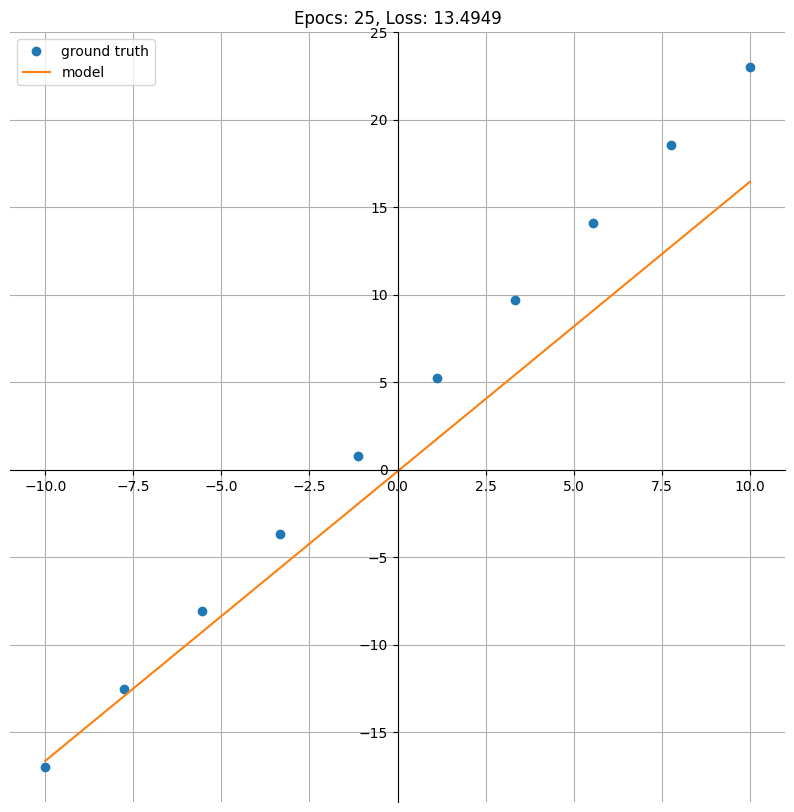

Epoch: 50; Train Loss: 8.868404388427734


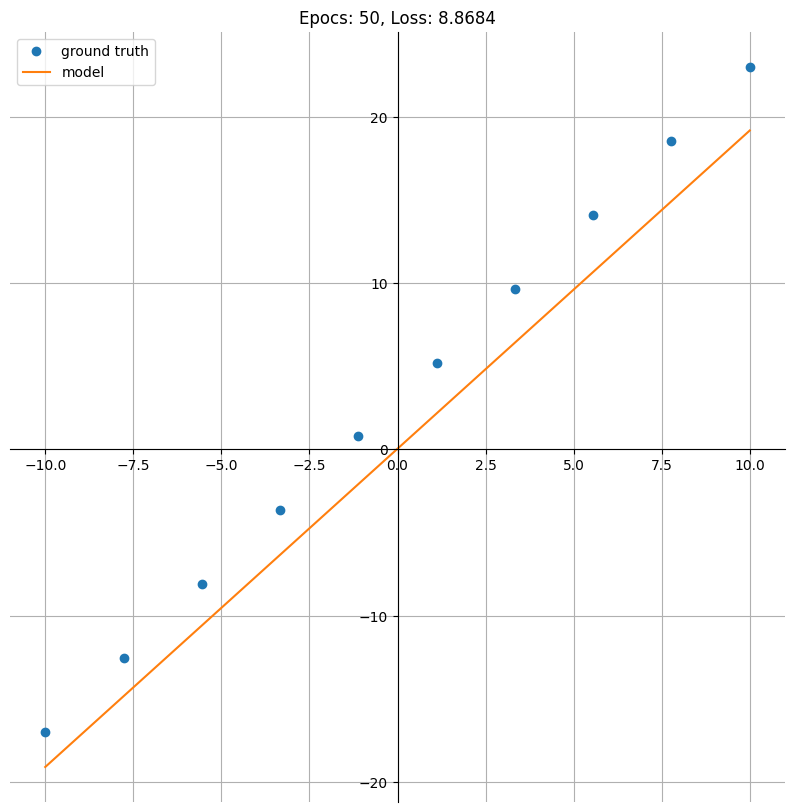

Epoch: 75; Train Loss: 7.932298183441162


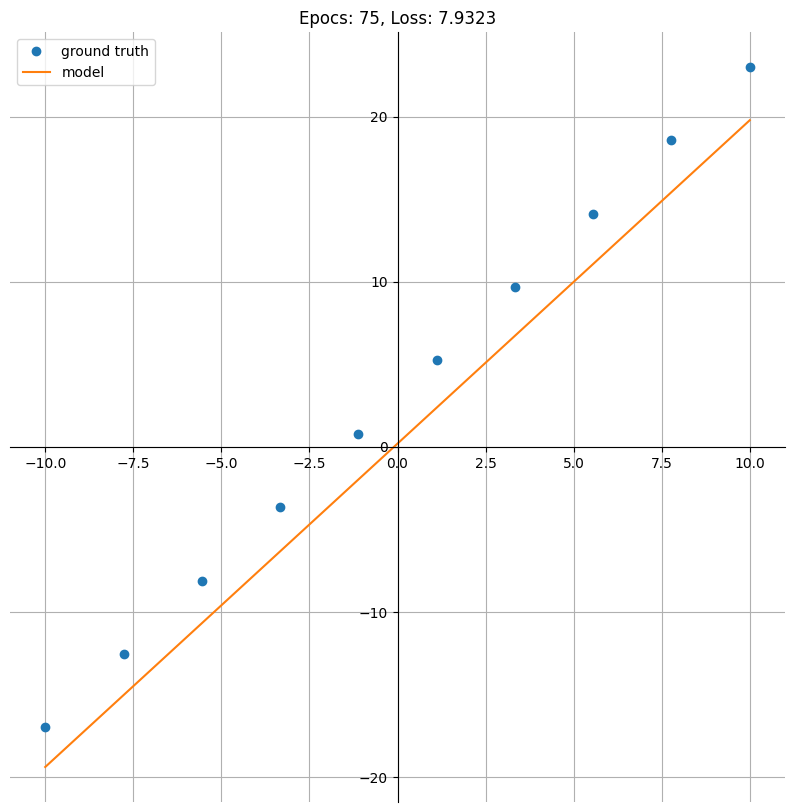

Epoch: 100; Train Loss: 7.177134990692139


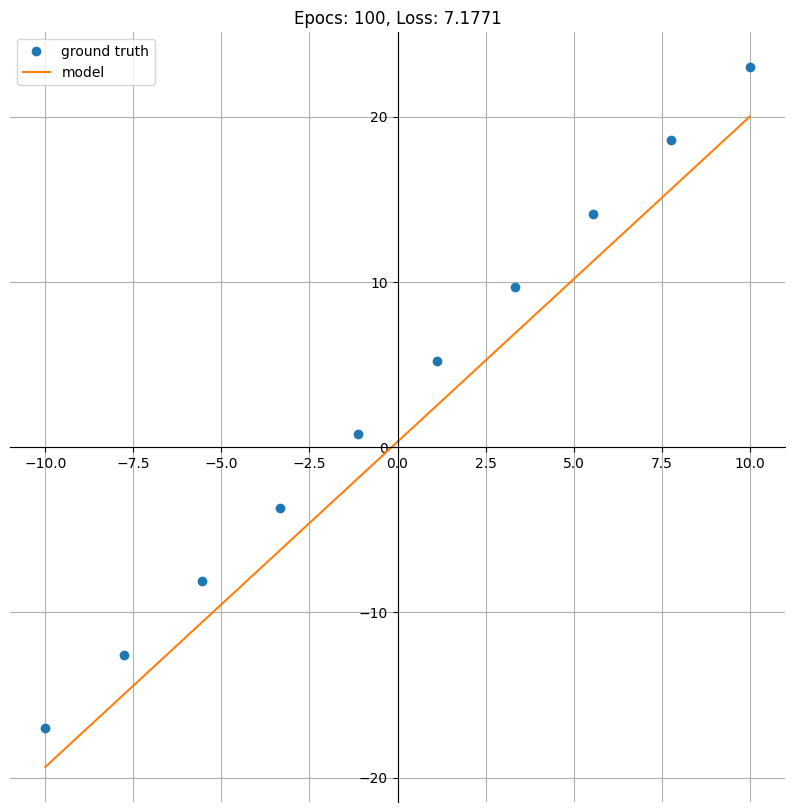

Epoch: 125; Train Loss: 6.496220111846924


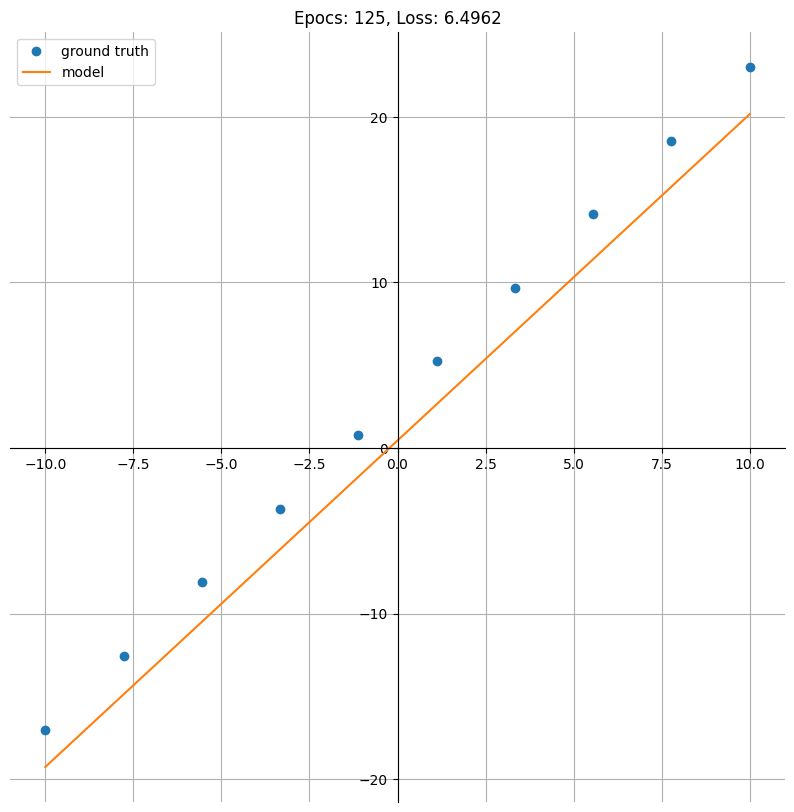

Epoch: 150; Train Loss: 5.879971504211426


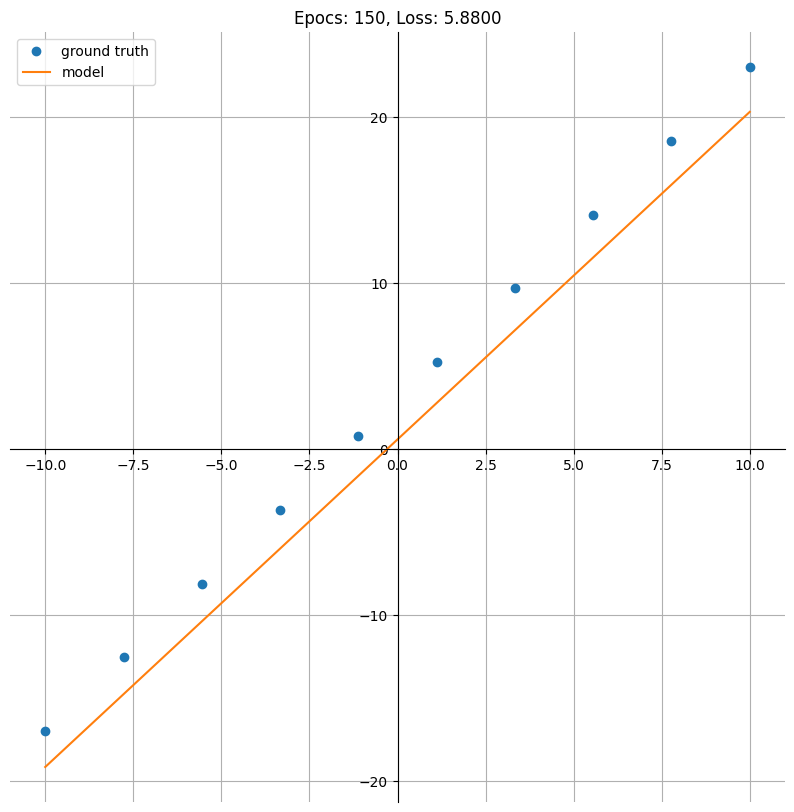

Epoch: 175; Train Loss: 5.322183132171631


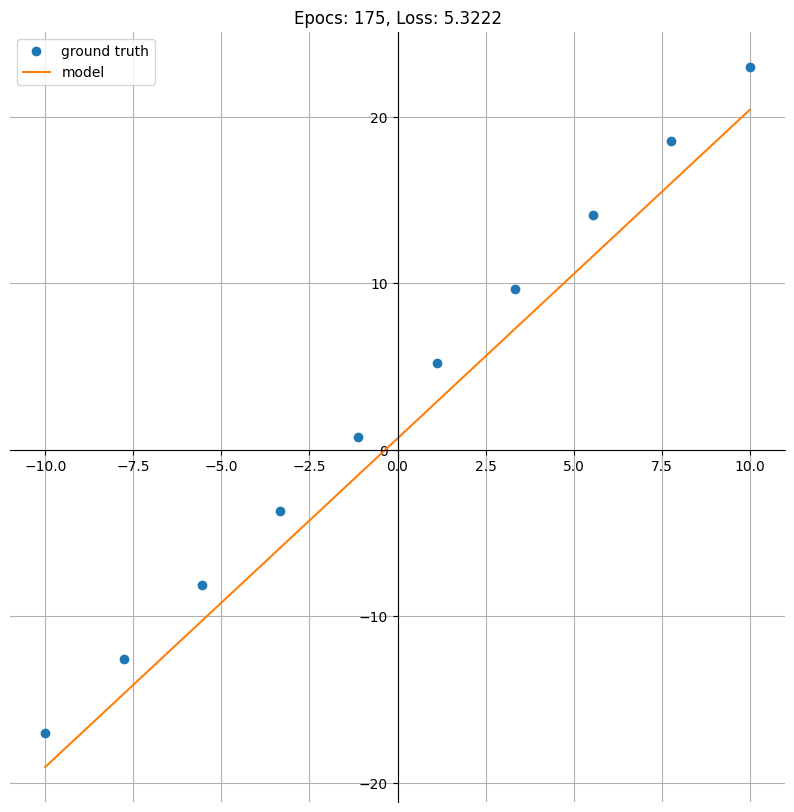

Epoch: 200; Train Loss: 4.817309379577637


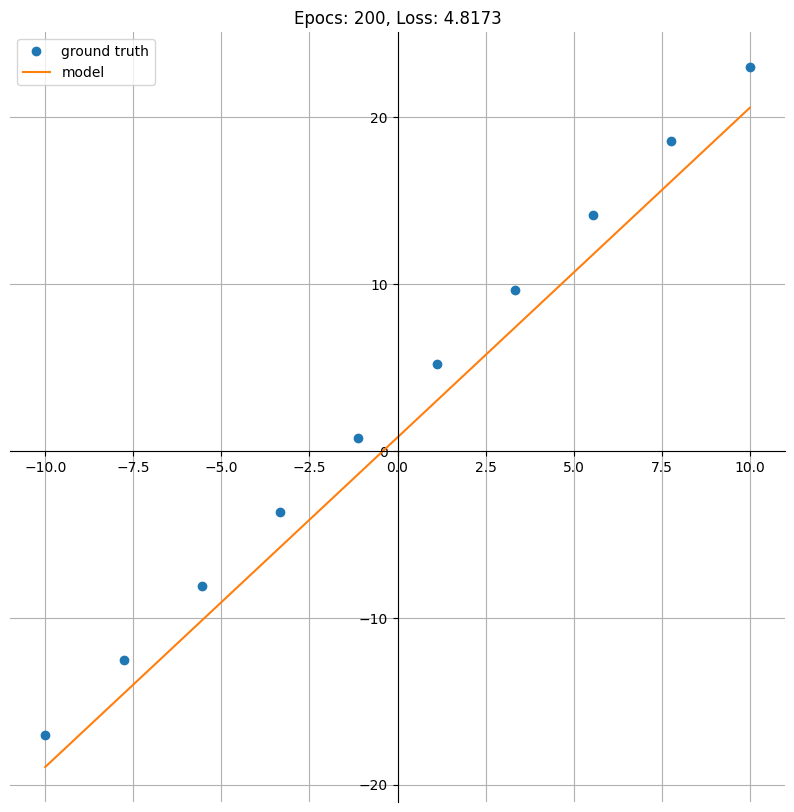

Epoch: 225; Train Loss: 4.3603291511535645


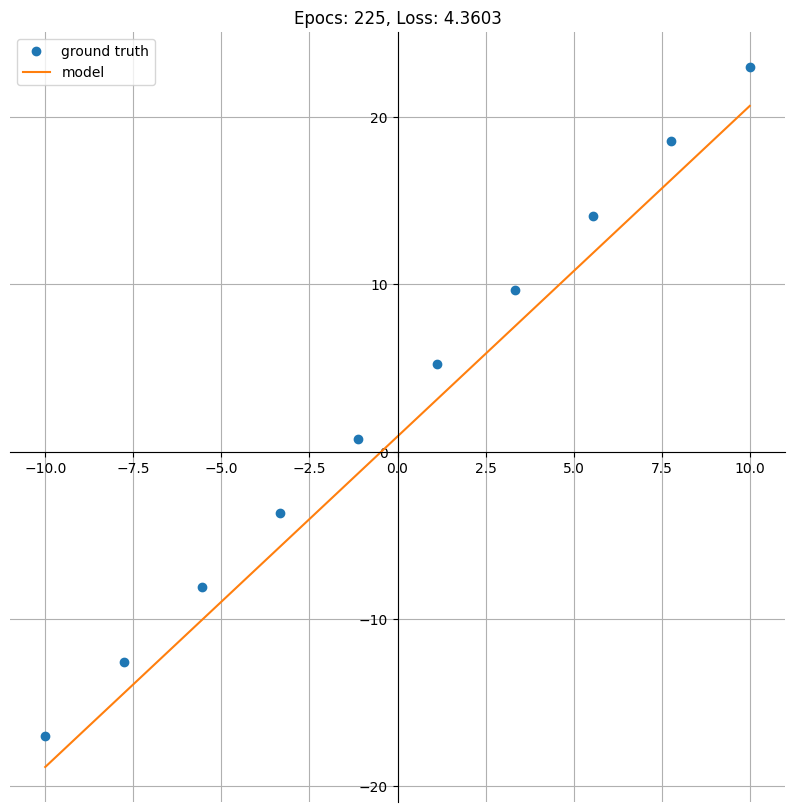

Epoch: 250; Train Loss: 3.9466989040374756


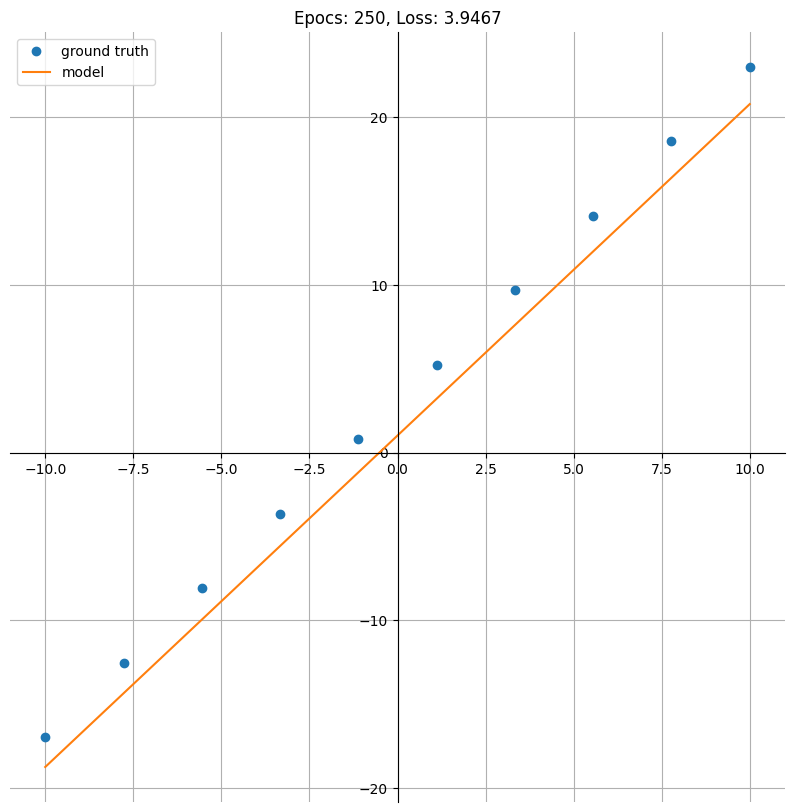

Epoch: 275; Train Loss: 3.57230544090271


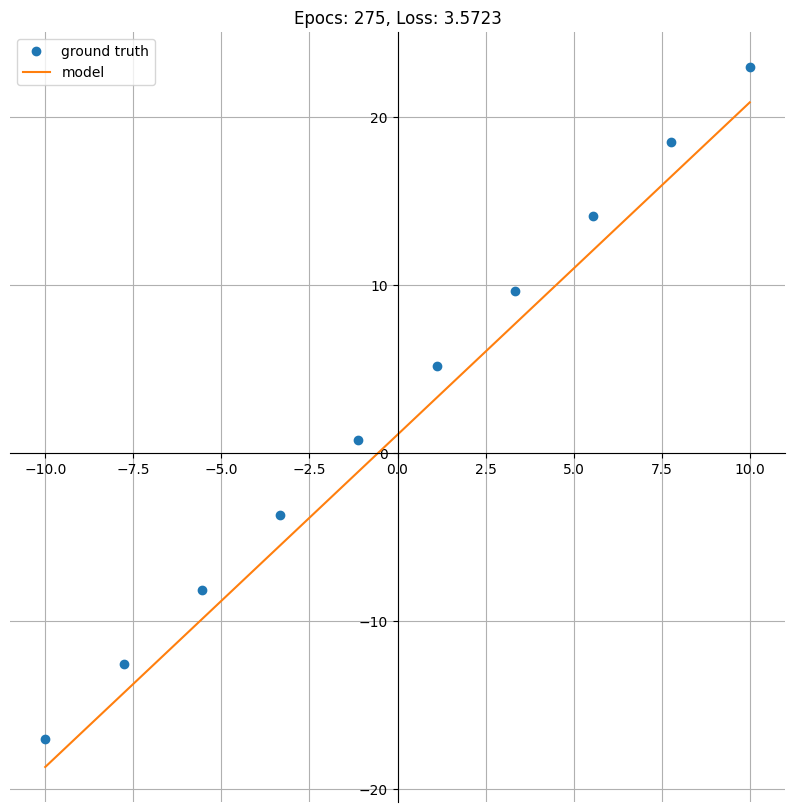

Epoch: 300; Train Loss: 3.233429193496704


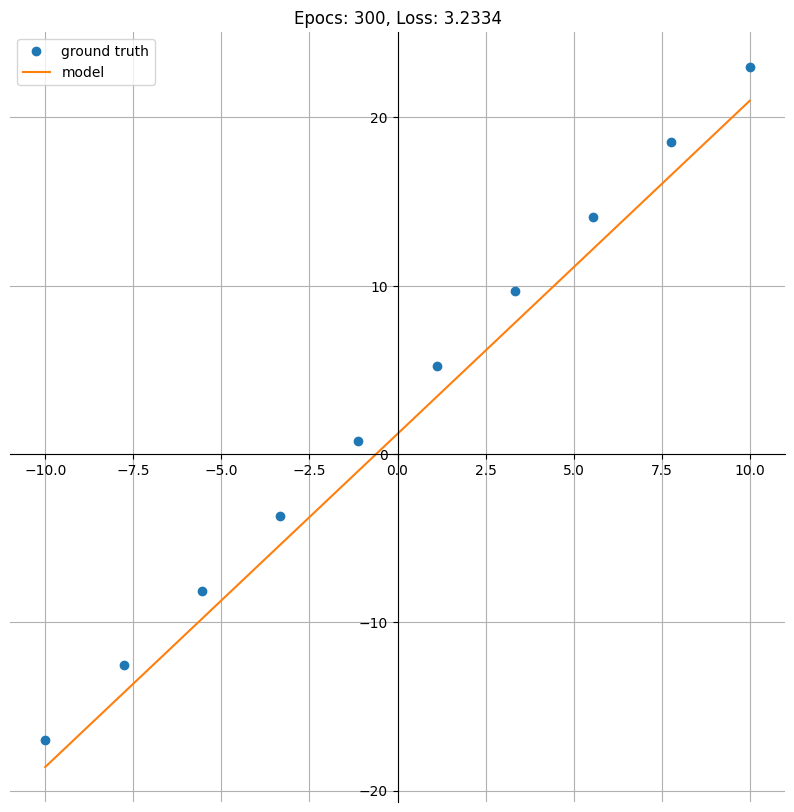

Epoch: 325; Train Loss: 2.9266998767852783


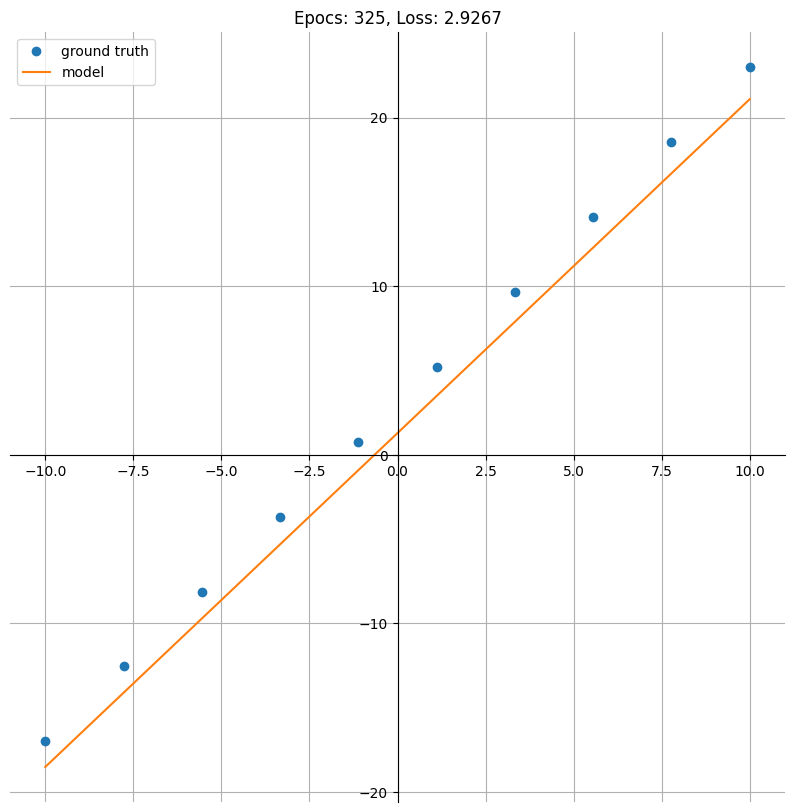

Epoch: 350; Train Loss: 2.6490654945373535


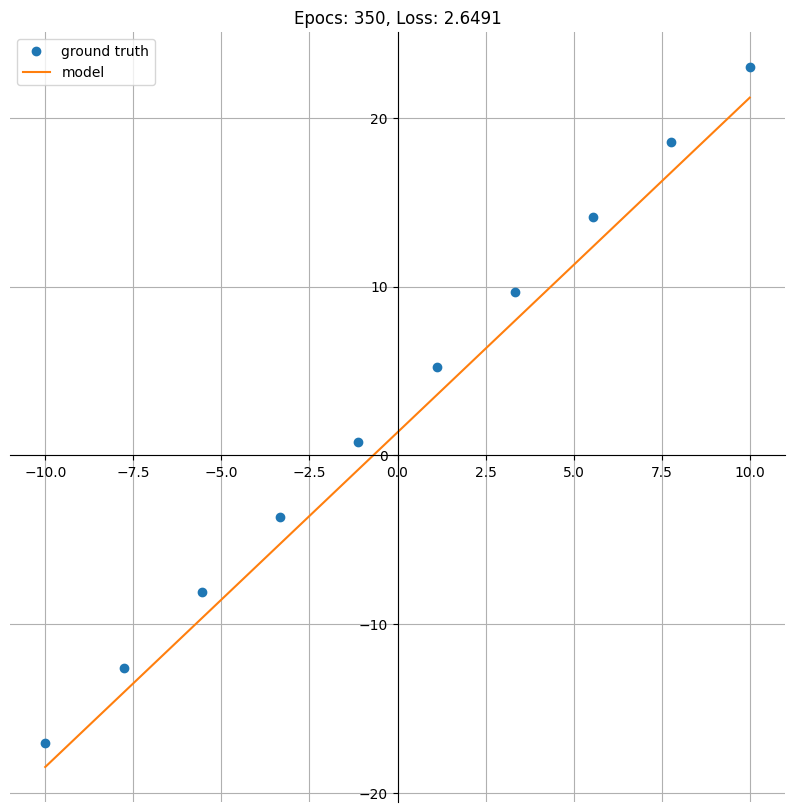

Epoch: 375; Train Loss: 2.3977692127227783


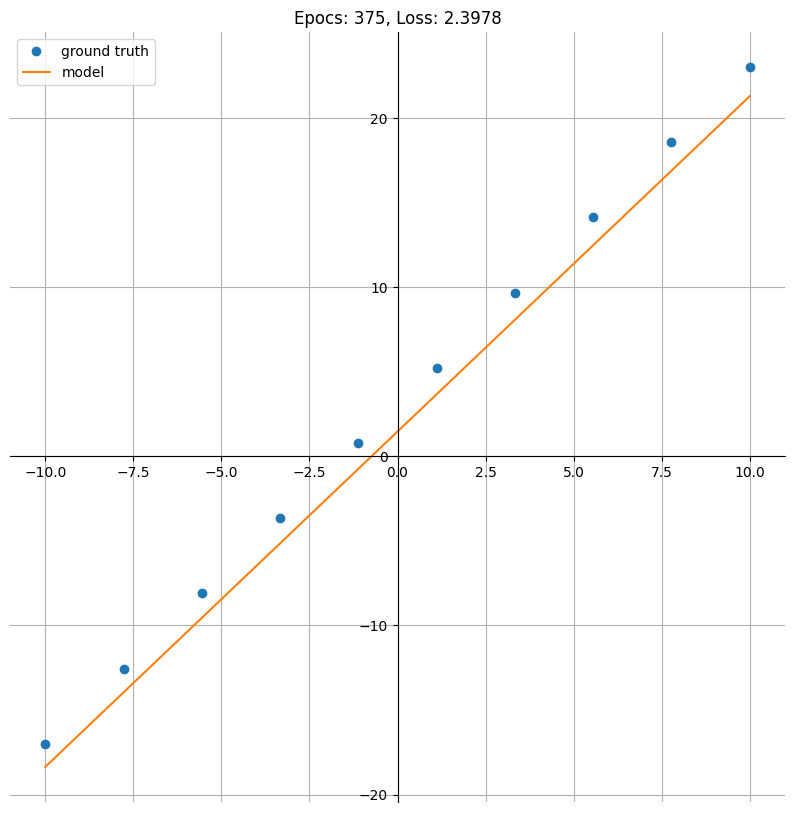

Epoch: 400; Train Loss: 2.170311689376831


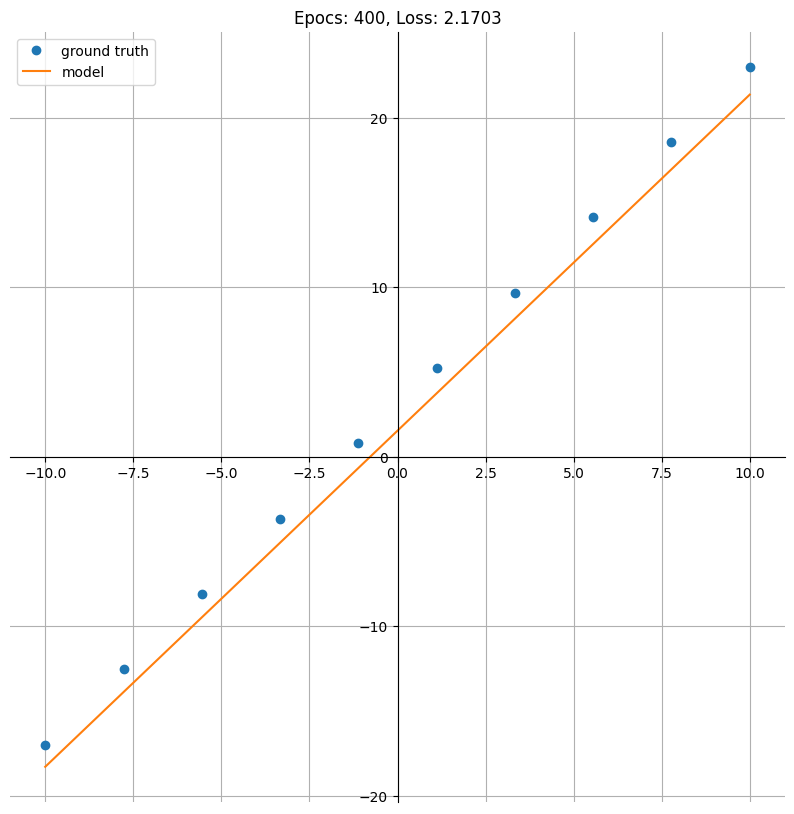

Epoch: 425; Train Loss: 1.9644311666488647


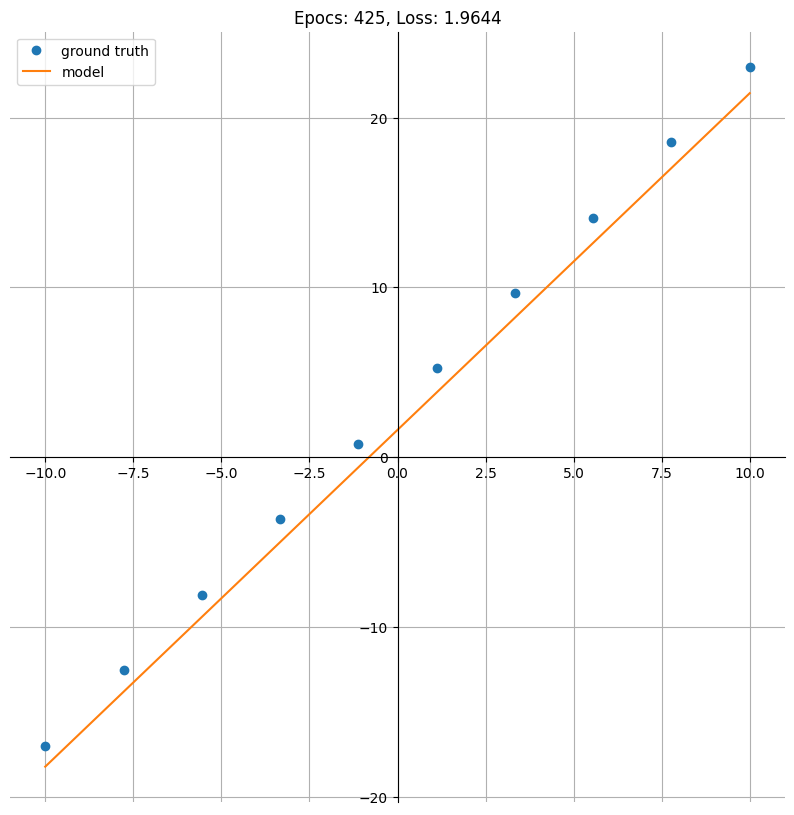

Epoch: 450; Train Loss: 1.7780812978744507


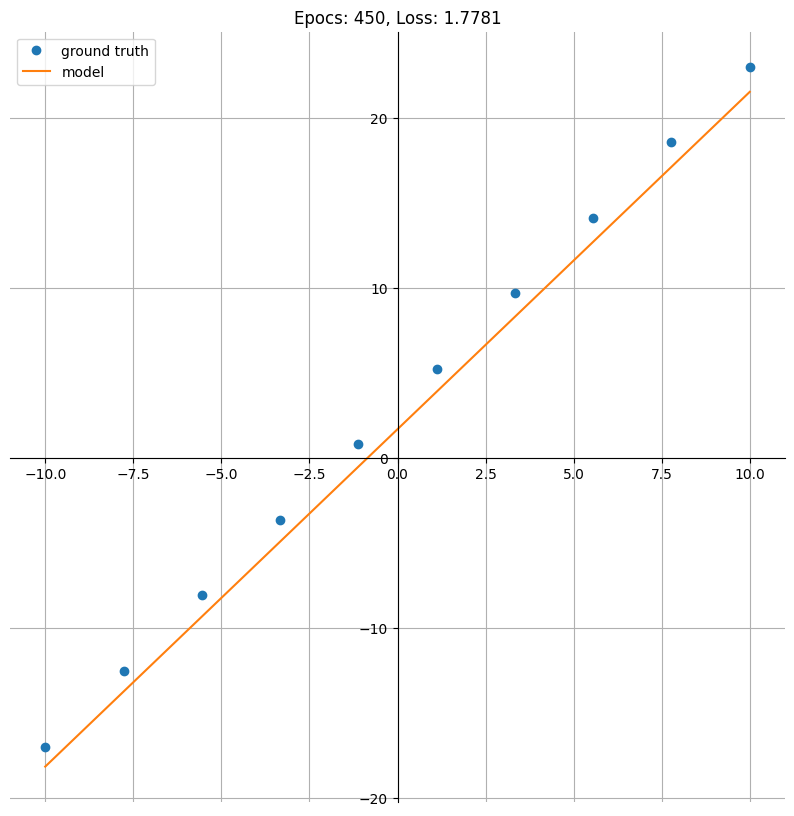

Epoch: 475; Train Loss: 1.6094084978103638


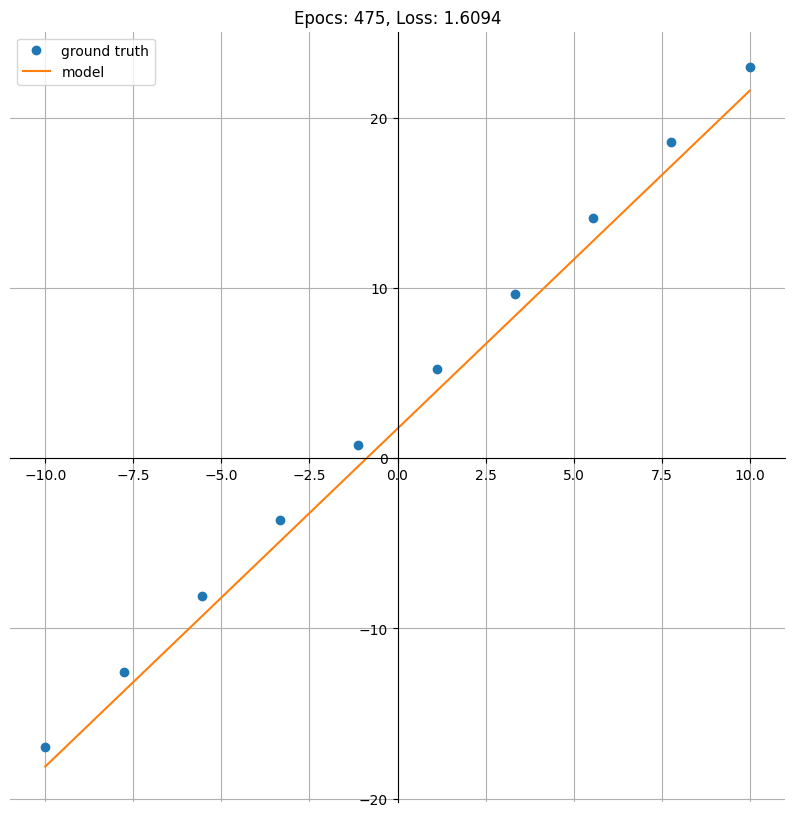

Epoch: 500; Train Loss: 1.45673668384552


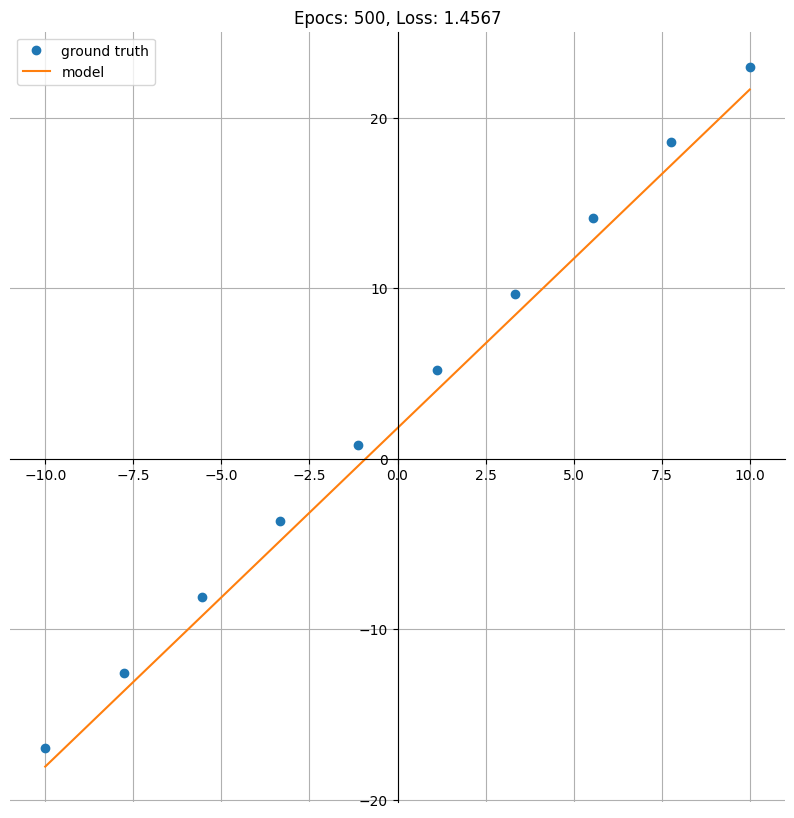

Epoch: 525; Train Loss: 1.3185479640960693


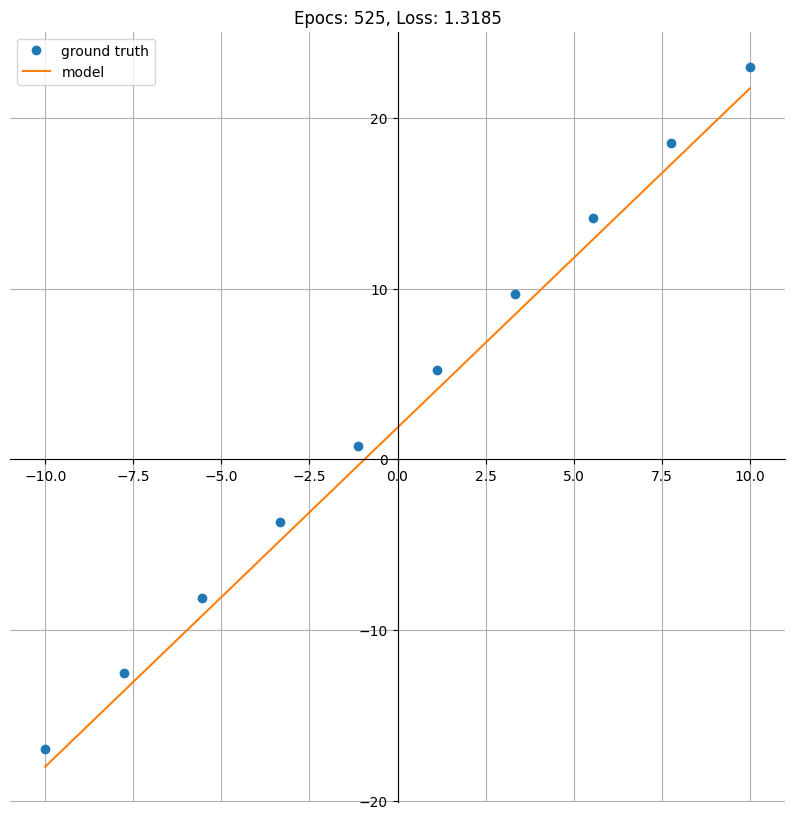

Epoch: 550; Train Loss: 1.1934670209884644


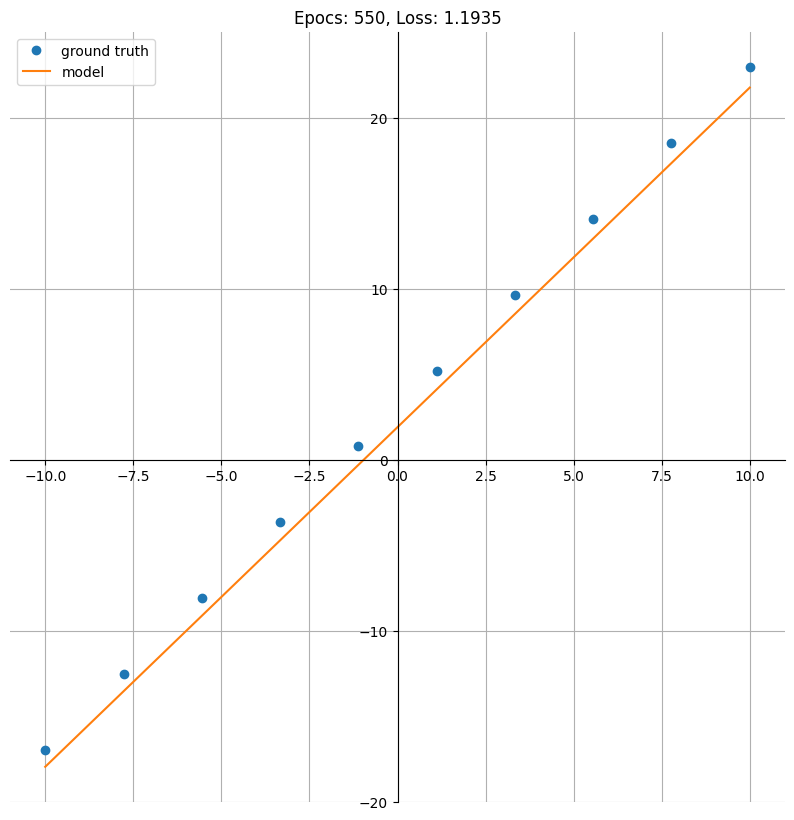

Epoch: 575; Train Loss: 1.0802525281906128


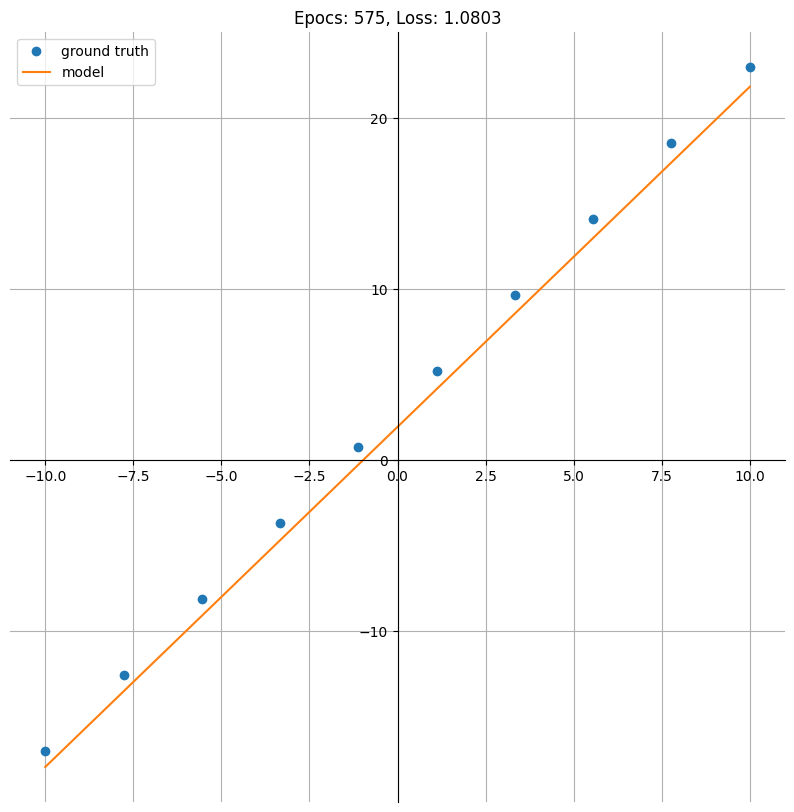

Epoch: 600; Train Loss: 0.9777771830558777


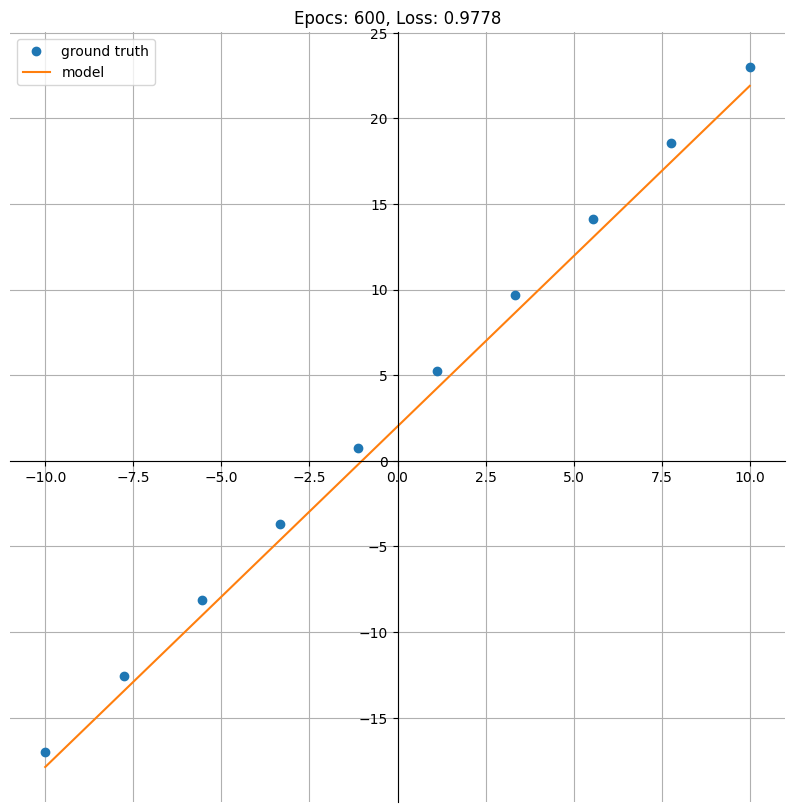

Epoch: 625; Train Loss: 0.8850218057632446


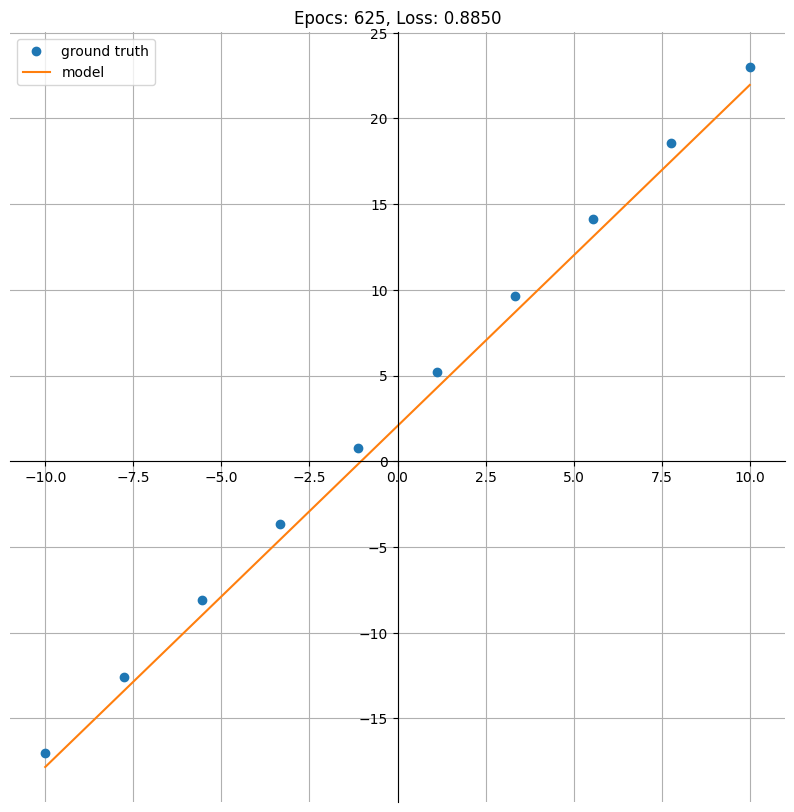

Epoch: 650; Train Loss: 0.8010672926902771


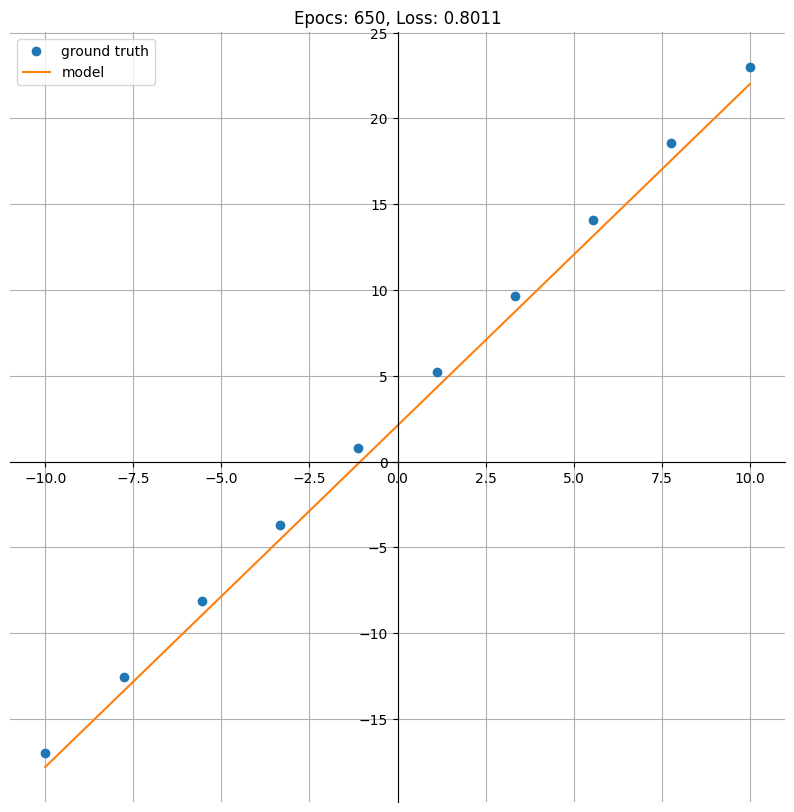

Epoch: 675; Train Loss: 0.7250758409500122


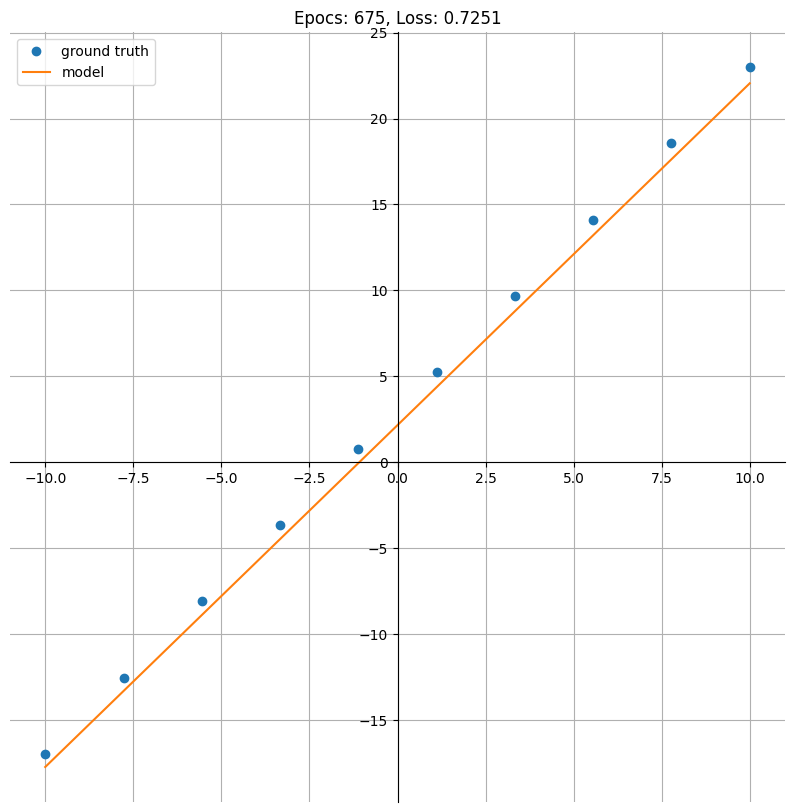

Epoch: 700; Train Loss: 0.6562938690185547


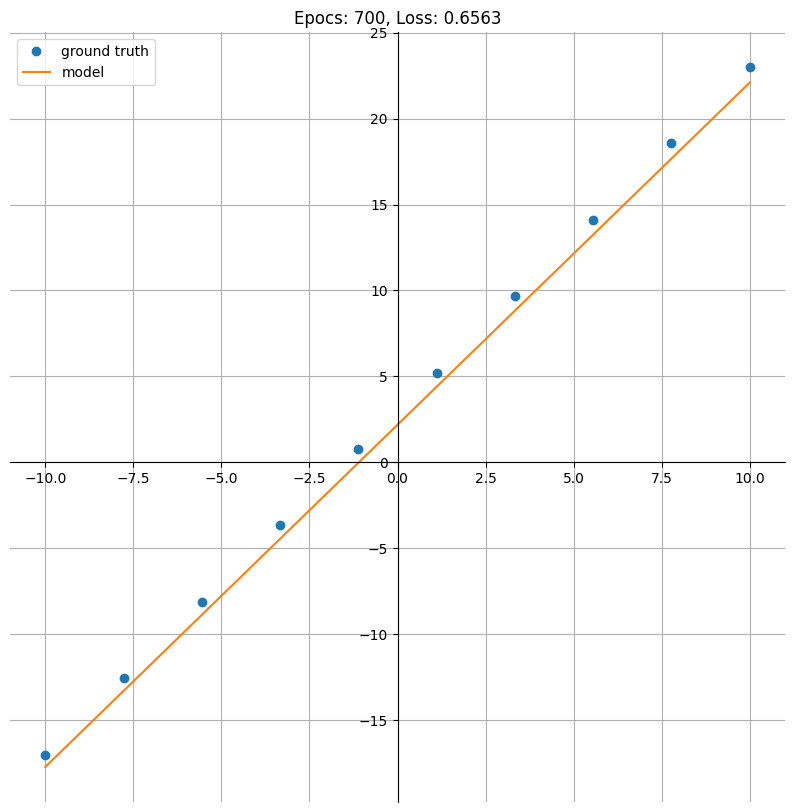

Epoch: 725; Train Loss: 0.5940356850624084


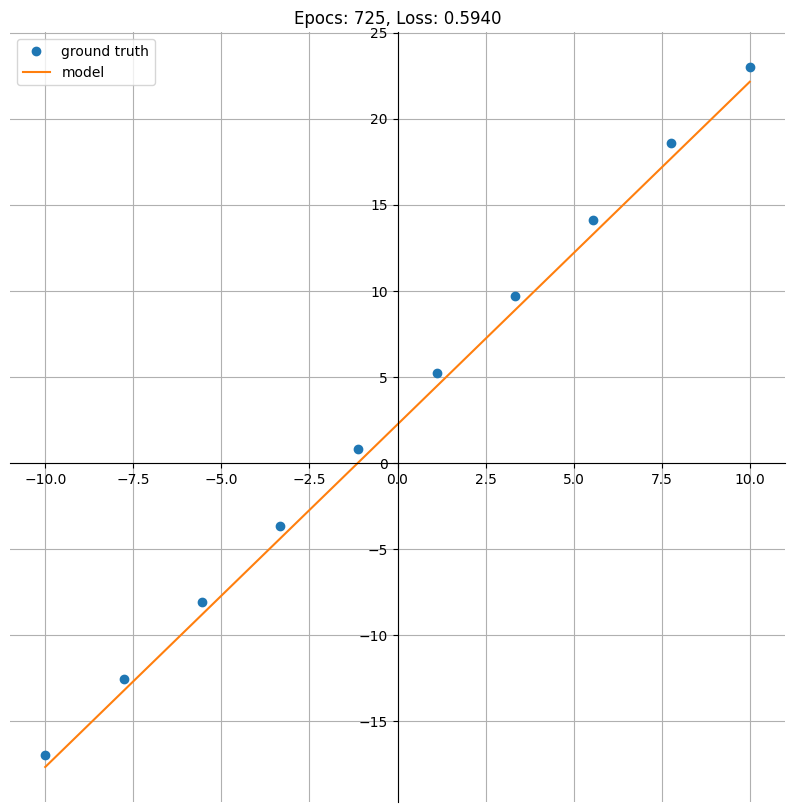

Epoch: 750; Train Loss: 0.5376834869384766


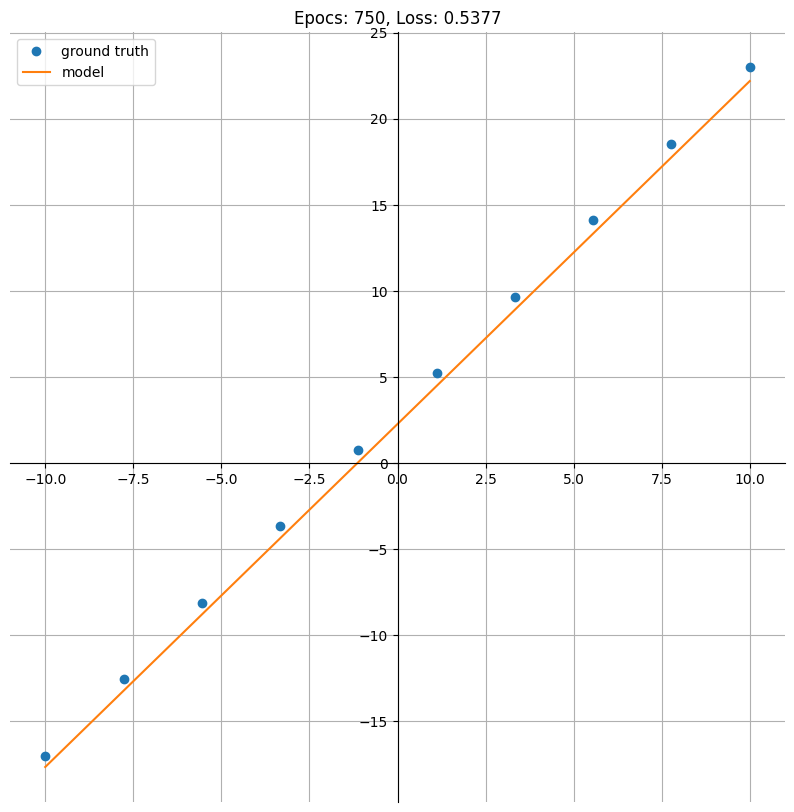

Epoch: 775; Train Loss: 0.48667824268341064


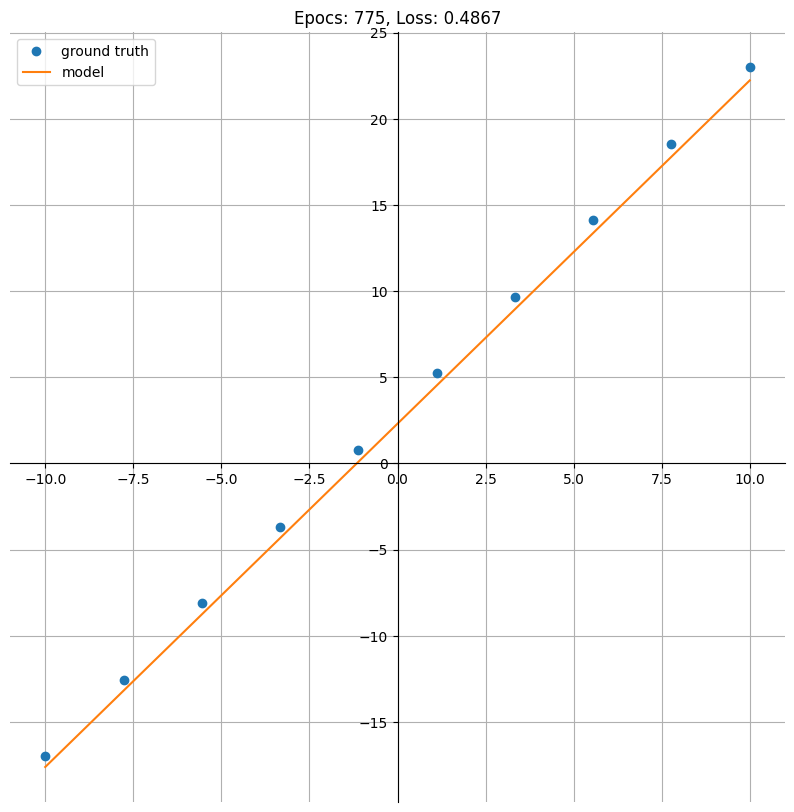

Epoch: 800; Train Loss: 0.44051095843315125


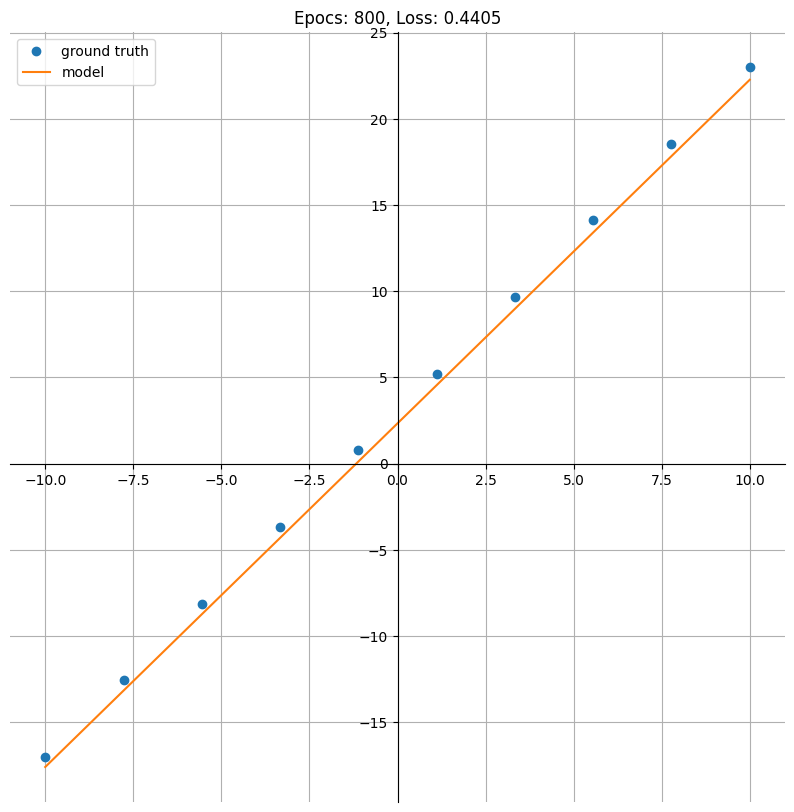

Epoch: 825; Train Loss: 0.3987237513065338


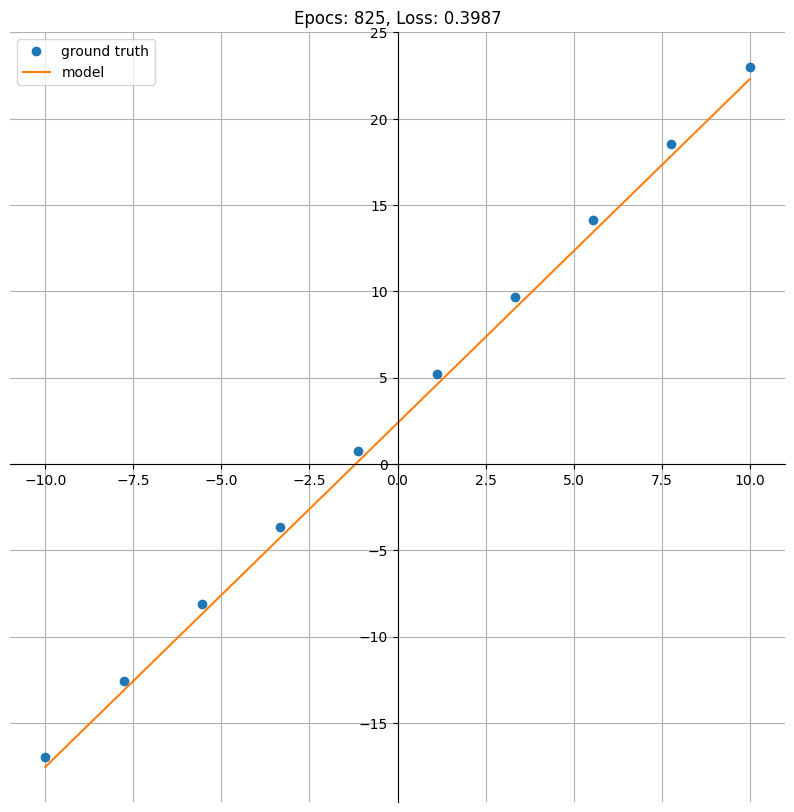

Epoch: 850; Train Loss: 0.36089983582496643


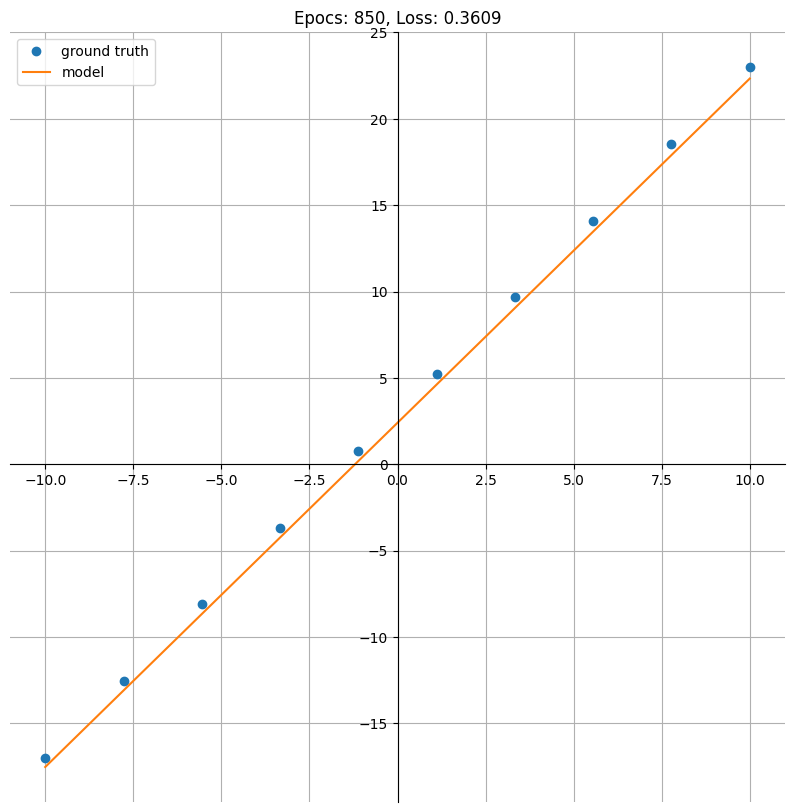

Epoch: 875; Train Loss: 0.3266645073890686


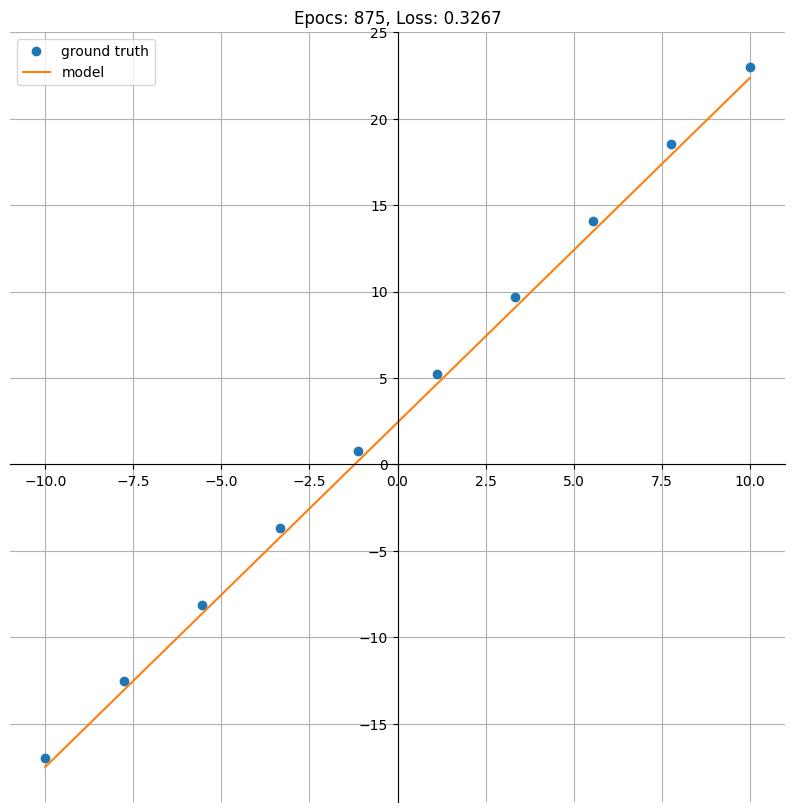

Epoch: 900; Train Loss: 0.295676589012146


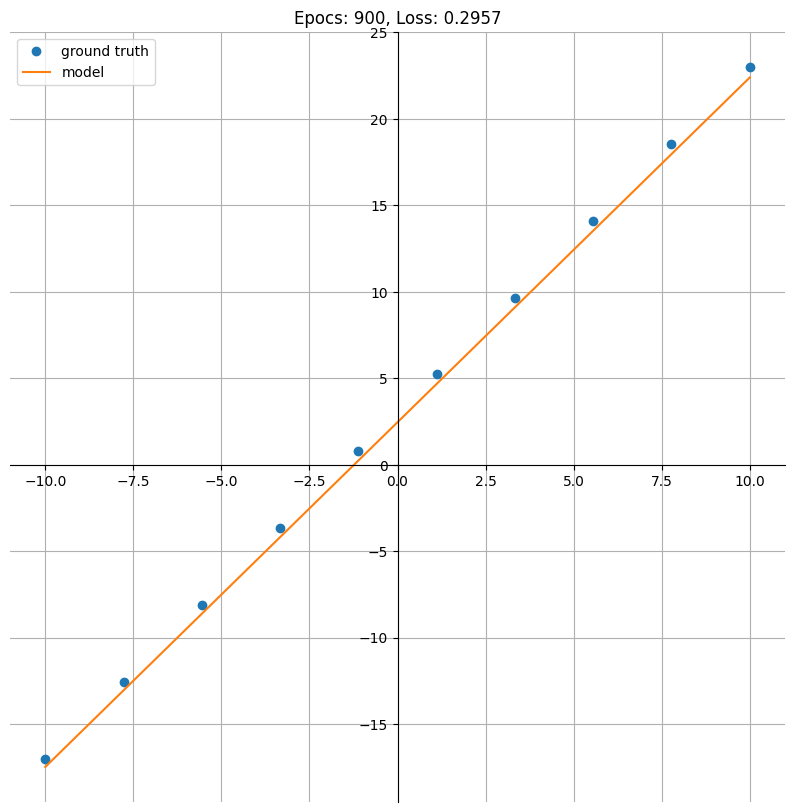

Epoch: 925; Train Loss: 0.2676284611225128


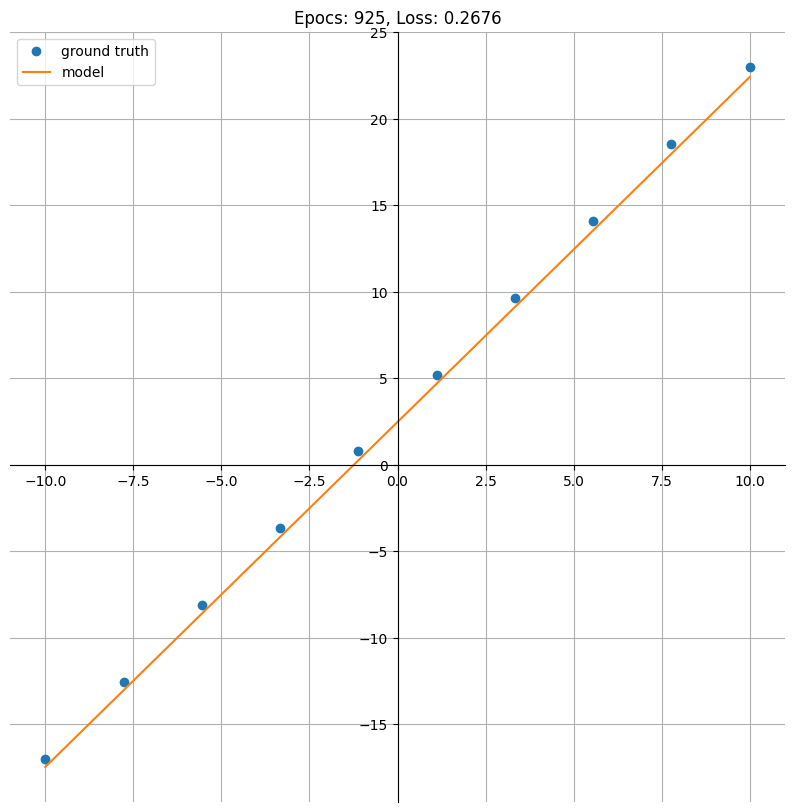

Epoch: 950; Train Loss: 0.24224033951759338


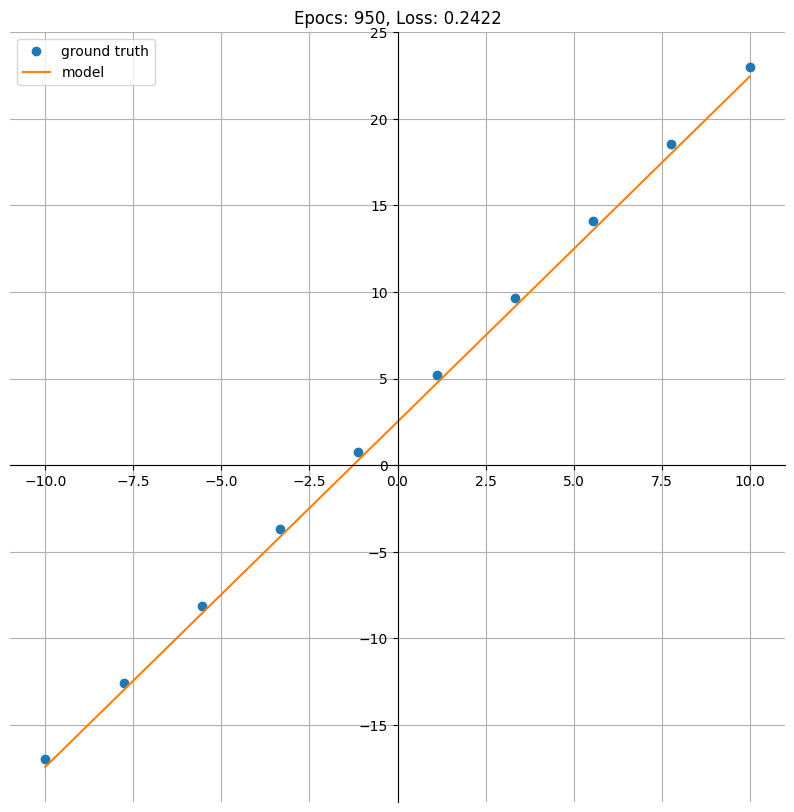

Epoch: 975; Train Loss: 0.21926112473011017


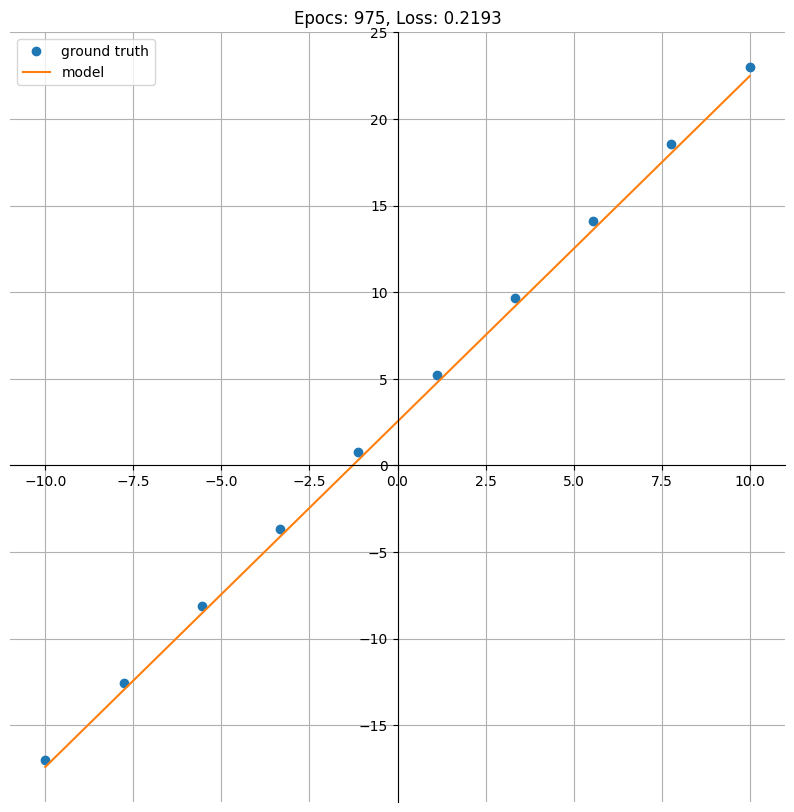

Epoch: 1000; Train Loss: 0.1984613984823227


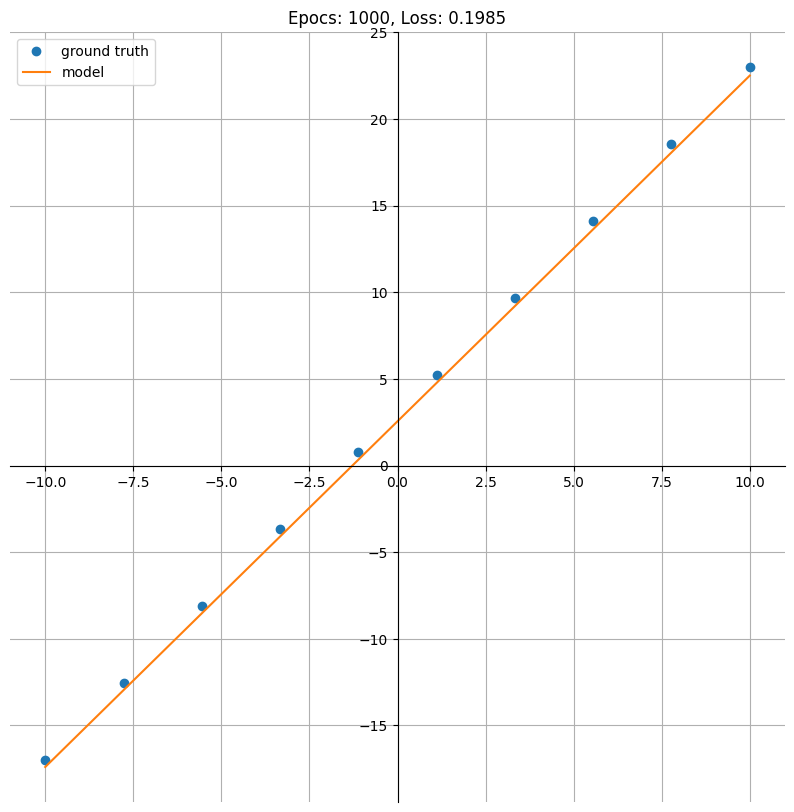

Test Loss: 0.19568505883216858


In [ ]:
epochs = 1001

# Let''s make a Gif of the training
filename_output = "./line_approximation.gif"
writer = imageio.get_writer(filename_output, mode='I', duration=0.3)

for t in range(epochs):
  train_loss = train(model, train_dataloader, lossfunc, optimizer)
  if t % 25 == 0:
    print(f"Epoch: {t}; Train Loss: {train_loss}")
    image = plot_comparison(line, model, epoc=t, loss=train_loss)
    # appending to gif
    writer.append_data(image)

test_loss = test(model, test_dataloader, lossfunc)
print(f"Test Loss: {test_loss}")
writer.close()

## **Task 5** (1 pt) **Describe what you observed during the experiments:**

(your observations)...

# 4. Now, it's your turn!

You will find below the definition of a new model, a fully connected network with 5 layers and the Rectified Linear Unit function as activation function. You should use the infrastructure defined in the example to train this model to approximate a more sophisticated function (for example, a parabola).

### **Tasks 6-9** [Optional]: (0.5 pts each)

- 6) Experiment with the network architecture: increase or decrease the number of layers; change the number of neurons in specific layers etc.
- 7) Choose the function you'll use to build your dataset. The simplest way to make it work is to build a new instance of AlgebraicDataset passing a new lambda function and a new (or same) domain. However, feel free to experiment more complex ways of defining a function.
- 8) Experiment different hyperparameters such as number of training epochs, learning rate, or loss function.
- 9) Describe what you learned during the experiments.


In [ ]:
#Define the Model Architecture
class MultiLayerNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(1, 8),
        nn.ReLU(),
        #Write your code here
    )

  def forward(self, x):
    return self.layers(x)

## *Write your solution below this cell*

# **Observations:**
Describe here what you have learned during this assignment...